In [1]:
%run ./get_fixed_variables.ipynb # load plotting functions and fixed vars

## Load processed data

In [2]:
## SW cloud forcing [Wm2]
SWCF_1xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/SWCF_PI_strato.npy')
SWCF_1xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/SWCF_PI_nostrato.npy')
PS_piControl = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/PS_piControl.npy')
P_piControl = 1000*hyam[:, None, None] + hybm[:, None, None]*np.nanmean(np.average(PS_piControl[-120:,:,:], axis= 0)*strato_mask_plot)

In [3]:
SWCF_8xco2 = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/SWCF_8xco2_spinup.npy')
SWCF_1xco2 = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/SWCF_PI.npy')

In [4]:
## parameters from Table 1 describing seasonal/diurnal cycle of LWP and cloud fraction (CLD)

CLD_bar = 0.7 # mean cloud fraction
delt_s_CLD = 0.1 # amplitude of seasonal cycle for CLD
delt_d_CLD = 0.15 # amplitude of diurnal cycle for CLD

ICLWP_bar = 0.093 # [kg m-2], mean LWP in cloud
delt_s_ICLWP = 0.013 # [kg m-2], amplitude of seasonal cycle for LWP
delt_d_ICLWP = 0.006 # [kg m-2], amplitude of dirunal cycle for LWP

n_s_shift = 40*24*2 # seasonal cycle shift to obtain maximum in September

n_d_shift = 0 # diurnal cycle shift, just for example, actually depends on longitude

In [5]:
## analytic formulae for CLD and LWP
n_step_year = 2*24*365 # model steps per year, one every 30 seconds
n_step_list = np.linspace(0,n_step_year,n_step_year) # model step, one step every 30 minutes
n_step_day = 2*24 # model steps per day

CLD_d_nstep = delt_d_CLD*np.sin(2*np.pi*(n_step_list-n_d_shift)/n_step_day)
CLD_nstep = CLD_bar - delt_s_CLD*np.sin(2*np.pi*(n_step_list-n_s_shift)/n_step_year) + CLD_d_nstep

## vertical shape profile 

vertical_shape_CLD = [0.0,0.0, 0.0, 0.002, 0.47,1.0,0.738,0.313,0.076,0.005,0.0]

In [6]:
## load CERES data

CERES_data = nc.Dataset('/glade/campaign/univ/uhar0013/asalazar/saved_data/CERES_EBAF-TOA_Ed4.2_Subset_CLIM01-CLIM12.nc')
lon_CERES = CERES_data['lon'][:]
lat_CERES = CERES_data['lat'][:]
CERES_sw_TOA_all = np.average(CERES_data['toa_sw_all_clim'], axis = 0) # take annual average
CERES_sw_TOA_clr = np.average(CERES_data['toa_sw_clr_c_clim'], axis = 0)
time_CERES = CERES_data['ctime'][:]

/glade/u/apps/opt/conda/envs/npl-2024a/lib/python3.11/site-packages/numpy/lib/function_base.py:511: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  a = np.asanyarray(a)
/glade/u/apps/opt/conda/envs/npl-2024a/lib/python3.11/site-packages/numpy/lib/function_base.py:511: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  a = np.asanyarray(a)


In [7]:
CERES_SW_CRE = CERES_sw_TOA_clr - CERES_sw_TOA_all

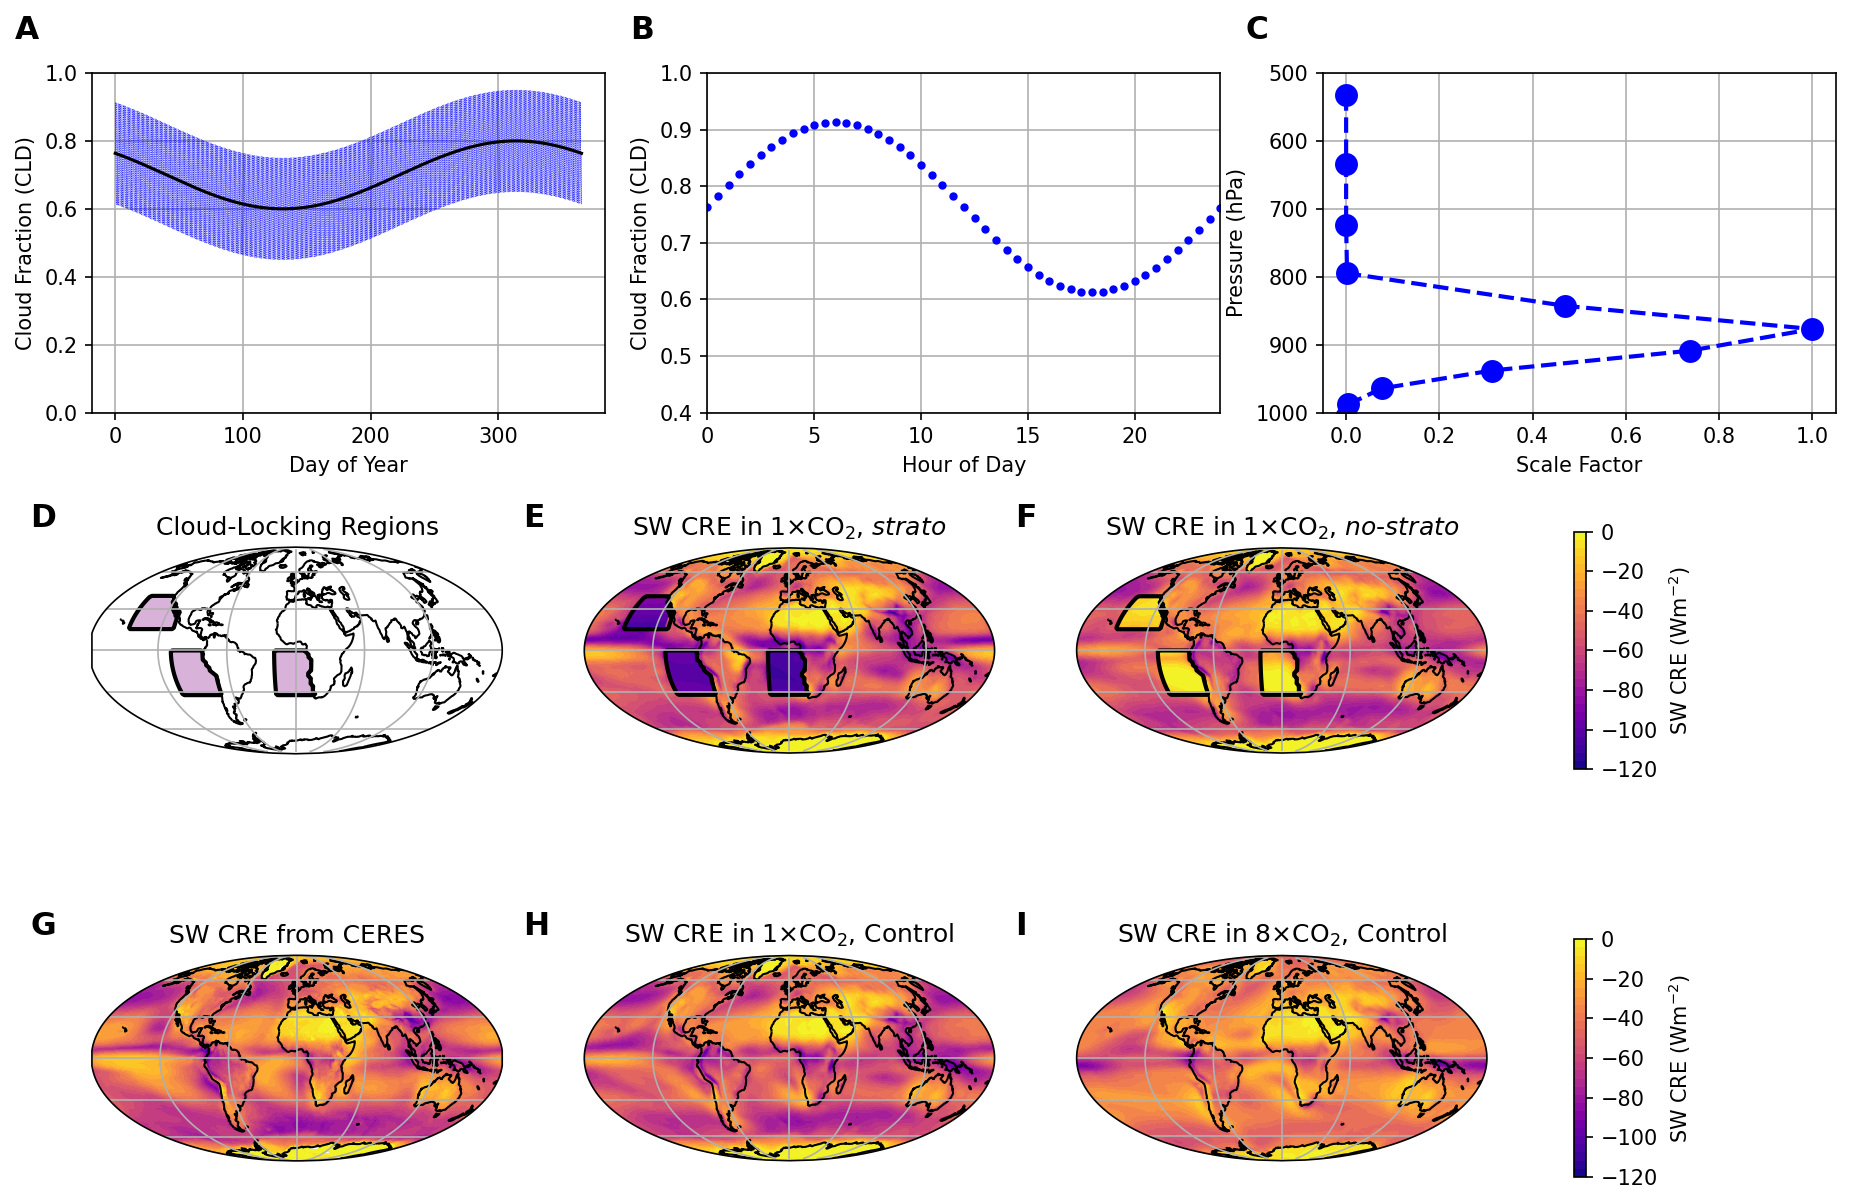

In [9]:
# create a figure with a 3x3 grid of subplots, with the second and third rows having map projections
fig = plt.figure(figsize=(15, 10), dpi=150)
gs = fig.add_gridspec(3, 3)

# First row - Vertical profile plots
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

ax1.plot(n_step_list/(2*24), CLD_nstep, color='blue', linestyle='--', alpha=1, linewidth=0.2)
ax1.plot(n_step_list/(2*24), CLD_nstep - CLD_d_nstep, 'k')
ax1.set_ylim(0, 1)
ax1.set_ylabel('Cloud Fraction (CLD)')
ax1.set_xlabel('Day of Year')
ax1.grid()
ax1.annotate("A", xy=(-0.15, 1.1), xycoords="axes fraction", fontsize=15, weight='bold')

ax2.plot(n_step_list/2, CLD_nstep, 'b.')
ax2.set_ylabel('Cloud Fraction (CLD)')
ax2.set_xlabel('Hour of Day')
ax2.grid()
ax2.set_xlim(0, 24)
ax2.set_ylim(0.4, 1)
ax2.annotate("B", xy=(-0.15, 1.1), xycoords="axes fraction", fontsize=15, weight='bold')

ax3.plot(vertical_shape_CLD, P_piControl[-11:, 0, 0]/100, 'b.--', markersize=20, linewidth=2, label='Cloud Fraction')
ax3.set_ylabel('Pressure (hPa)')
ax3.set_xlabel('Scale Factor')
ax3.set_ylim(1000, 500)
ax3.grid()
ax3.annotate("C", xy=(-0.15, 1.1), xycoords="axes fraction", fontsize=15, weight='bold')

# Second row - Map plots with Mollweide projection
ax4 = fig.add_subplot(gs[1, 0], projection=ccrs.Mollweide())
ax5 = fig.add_subplot(gs[1, 1], projection=ccrs.Mollweide())
ax6 = fig.add_subplot(gs[1, 2], projection=ccrs.Mollweide())

strato_mask_plot_new, lons = add_cyclic_point(strato_mask_plot, coord=lon)
c = ax4.contourf(lons, lat, strato_mask_plot_new, [0.3, 1], colors=[(0.5, 0.0, 0.5, 1.0)], alpha=0.3, extend='both', transform=ccrs.PlateCarree())
strato_mask_new, lons = add_cyclic_point(strato_mask, coord=lon)
c = ax4.contour(lons, lat, strato_mask_new, [0.5], cmap='gray', linewidths=2, transform=ccrs.PlateCarree())
ax4.coastlines(resolution='110m')
ax4.gridlines()
ax4.set_title('Cloud-Locking Regions')
ax4.annotate("D", xy=(-0.15, 1.1), xycoords="axes fraction", fontsize=15, weight='bold')

SWCF_1xco2_strato_new, lons = add_cyclic_point(np.average(SWCF_1xco2_strato[-120:], axis=0), coord=lon)
c = ax5.contourf(lons, lat, SWCF_1xco2_strato_new, cmap='plasma', levels=np.linspace(-120, 0, 30), transform=ccrs.PlateCarree())
c = ax5.contour(lons, lat, strato_mask_new, [0.5], cmap='gray', linewidths=2, transform=ccrs.PlateCarree())
ax5.coastlines(resolution='110m')
ax5.gridlines()
ax5.set_title('SW CRE in 1$\\times$CO$_2$, $\\it{strato}$')
ax5.annotate("E", xy=(-0.15, 1.1), xycoords="axes fraction", fontsize=15, weight='bold')

SWCF_1xco2_nostrato_new, lons = add_cyclic_point(np.average(SWCF_1xco2_nostrato[-120:], axis=0), coord=lon)
c = ax6.contourf(lons, lat, SWCF_1xco2_nostrato_new, cmap='plasma', levels=np.linspace(-120, 0, 30), transform=ccrs.PlateCarree())
clb = plt.colorbar(c, ax=[ax4, ax5, ax6], shrink=0.7, ticks=[-120, -100, -80, -60, -40, -20, 0], label='SW CRE (Wm$^{-2}$)')
c = ax6.contour(lons, lat, strato_mask_new, [0.5], cmap='gray', linewidths=2, transform=ccrs.PlateCarree())
ax6.coastlines(resolution='110m')
ax6.gridlines()
ax6.set_title('SW CRE in 1$\\times$CO$_2$, $\\it{no}$-$\\it{strato}$')
ax6.annotate("F", xy=(-0.15, 1.1), xycoords="axes fraction", fontsize=15, weight='bold')

# Third row - More map plots with Mollweide projection
ax7 = fig.add_subplot(gs[2, 0], projection=ccrs.Mollweide())
ax8 = fig.add_subplot(gs[2, 1], projection=ccrs.Mollweide())
ax9 = fig.add_subplot(gs[2, 2], projection=ccrs.Mollweide())


c = ax7.contourf(lon_CERES, lat_CERES, CERES_SW_CRE, cmap='plasma', levels=np.linspace(-120, 0, 30), transform=ccrs.PlateCarree())
ax7.coastlines(resolution='110m')
ax7.gridlines()
ax7.set_title('SW CRE from CERES')
ax7.annotate("G", xy=(-0.15, 1.1), xycoords="axes fraction", fontsize=15, weight='bold')

SWCF_1xco2_new, lons = add_cyclic_point(np.average(SWCF_1xco2[-120:], axis=0), coord=lon)
c = ax8.contourf(lons, lat, SWCF_1xco2_new, cmap='plasma', levels=np.linspace(-120, 0, 30), transform=ccrs.PlateCarree())
ax8.coastlines(resolution='110m')
ax8.gridlines()
ax8.set_title('SW CRE in 1$\\times$CO$_2$, Control')
ax8.annotate("H", xy=(-0.15, 1.1), xycoords="axes fraction", fontsize=15, weight='bold')

SWCF_8xco2_new, lons = add_cyclic_point(np.average(SWCF_8xco2[-120:], axis=0), coord=lon)
c = ax9.contourf(lons, lat, SWCF_8xco2_new, cmap='plasma', levels=np.linspace(-120, 0, 30), transform=ccrs.PlateCarree())
clb = plt.colorbar(c, ax=[ax7, ax8, ax9], shrink=0.7, ticks=[-120, -100, -80, -60, -40, -20, 0], label='SW CRE (Wm$^{-2}$)')
ax9.coastlines(resolution='110m')
ax9.gridlines()
ax9.set_title('SW CRE in 8$\\times$CO$_2$, Control')
ax9.annotate("I", xy=(-0.15, 1.1), xycoords="axes fraction", fontsize=15, weight='bold')

plt.savefig('./Figure_PDFs/Figure_1_raw.pdf', bbox_inches='tight')
plt.show()
